## Гауссово распределение, линейный дискриминантный анализ и наивный байес

### 1. Многомерное гауссово распределение
Создайте случайную выборку данных с двумерным гауссовым распределением. Для этого сперва сделайте два вектора из двух одномерных распределений с разными стандартными отклонениями $\sigma_1$ и $\sigma_2$, как показано ниже:  
``` python
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
```
После чего сделайте матрицу поворота на угол $\alpha$ и с помощью неё поверните набор точек в пространстве.  
Посчитайте матрицу ковариации для сгенерированных точек.  
Нарисуйте полученное облако точек и сравните его с облаком точек, полученных с помощью готовой функции:  `np.random.multivariate_normal()`


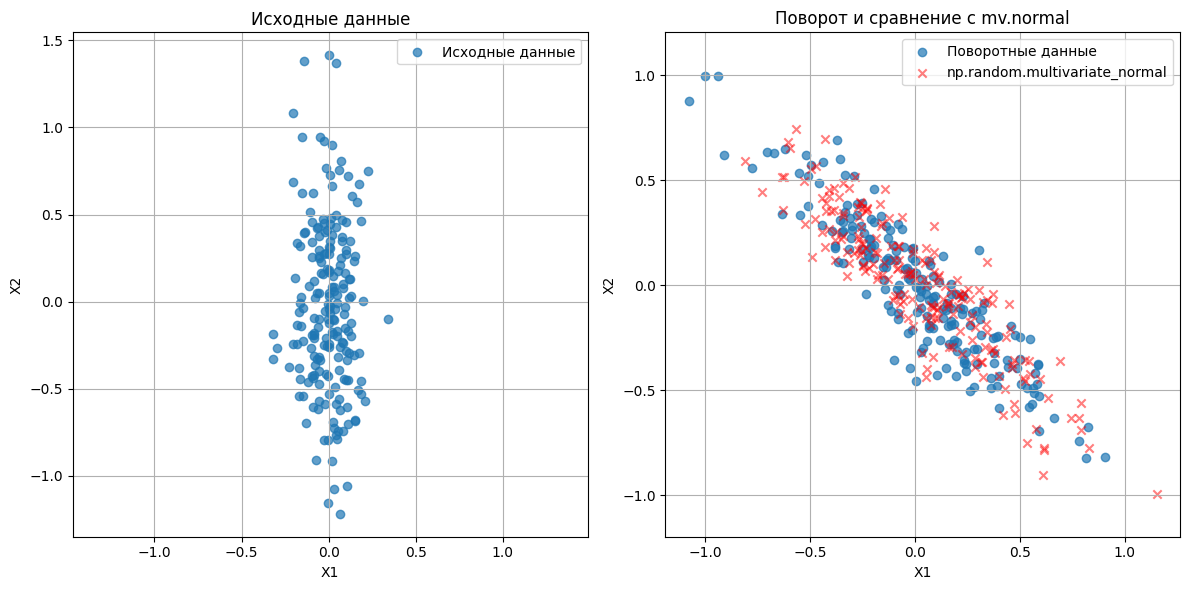

Ковариационная матрица после поворота:n [[ 0.12427469 -0.11015625]
 [-0.11015625  0.11896522]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
M = 200 # Параметры генерации данных
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1 # Исходные векторы
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1) # Объединяем в набор точек
Alpha_deg = 45 # Угол поворота (например возьмем 45 градусов)
Alpha_rad = np.deg2rad(Alpha_deg)
rotation_matrix = np.array([[np.cos(Alpha_rad), -np.sin(Alpha_rad)],[np.sin(Alpha_rad), np.cos(Alpha_rad)]]) # Матрица поворота
X_rotated = X @ rotation_matrix.T # Поворачиваем точки
cov_matrix = np.cov(X_rotated, rowvar=False) # Вычисляем ковариационную матрицу после поворота
# Генерируем набор данных при помощи multivariate_normal для сравнения
mean = np.mean(X_rotated, axis=0)
mv_normal_data = np.random.multivariate_normal(mean, cov_matrix, size=M)
plt.figure(figsize=(12, 6)) # Визуализация
# До поворота
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, label='Исходные данные')
plt.title('Исходные данные')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.grid(True)
plt.legend()
# После поворота и сгенерированные точки
plt.subplot(1, 2, 2)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.7, label='Поворотные данные')
plt.scatter(mv_normal_data[:, 0], mv_normal_data[:, 1], color='r', alpha=0.5, marker='x', label='np.random.multivariate_normal')
plt.title('Поворот и сравнение с mv.normal')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print("Ковариационная матрица после поворота:n", cov_matrix) # Вывод ковариационной матрицы

### 2. Плотность вероятности гауссового распределения
В общем виде $n$-мерное гауссово распределение имеет вид:  
$$p(x) = \frac{1}{(\sqrt{2\pi})^n \sqrt{detC}} e^{-\frac{1}{2}(x-\mu)^TС^{-1}(x-\mu)} \tag{1}$$  
где $x\in{R^n}$, $\mu\in{R^n}$ - среднее значение, $C$ - матрица ковариации.  

Сгенерируйте набор точек в двумерном пространстве (как делали в пункте 1 или другим способом). Посчитайте для них среднее значение и матрицу ковариации $\mu$ и $C$. Для оценки плотности вероятности (probability density function - `pdf`) гауссового распределения в произвольной точке используйте `scipy.stats.multivariate_normal`
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), либо можете посчитать вручную.  

Визуализируйте набор точек и плотность вероятности, для чего изобразите точки одним цветом, а фон раскрасьте в соответсвии с плотностью вероятности, для чего можете использовать пример ниже:  

``` python
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=[0,0], cov=[[0.3, 0], [0, 0.1]])
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
```

Среднее значение (μ): [2.06594123 3.08027201]
Ковариационная матрица (C): 
[[0.96179228 0.74111523]
 [0.74111523 1.91632588]]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


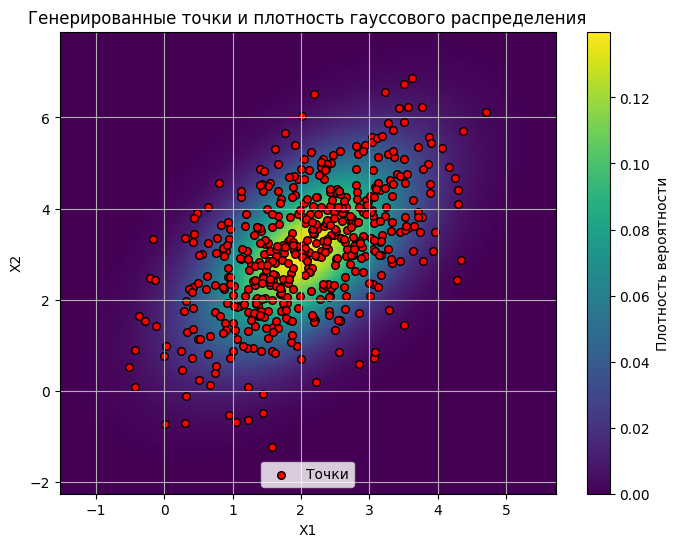

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
# 1. Генерация набора точек
np.random.seed(0)  # для воспроизводимости
num_points = 500
# Задаём параметры истинного распределения
mean_true = [2, 3]
cov_true = [[1.0, 0.8],[0.8, 2.0]]
# Генерируем точки
points = np.random.multivariate_normal(mean_true, cov_true, size=num_points)
# 2. Расчёт среднего и ковариационной матрицы
mu = np.mean(points, axis=0)
C = np.cov(points, rowvar=False)
print(f"Среднее значение (μ): {mu}")
print(f"Ковариационная матрица (C): \n{C}")
# 3. Создаём обьект для оценки плотности
m = multivariate_normal(mean=mu, cov=C)
# 4. Визуализация
# Создаём сетку точек
x = np.linspace(np.min(points[:,0]) - 1, np.max(points[:,0]) + 1, 200)
y = np.linspace(np.min(points[:,1]) - 1, np.max(points[:,1]) + 1, 200)
XX, YY = np.meshgrid(x, y)
grid_points = np.stack([XX.ravel(), YY.ravel()], axis=1)
# Расчёт плотности для каждой точки сетки
zz = m.pdf(grid_points).reshape(XX.shape)
# Визуализация
plt.figure(figsize=(8, 6))
# Фон, раскрашенный по плотности
plt.pcolor(XX, YY, zz, shading='auto', cmap='viridis')
plt.colorbar(label='Плотность вероятности')
# Точки набора
plt.scatter(points[:,0], points[:,1], c='red', s=30, edgecolors='k', label='Точки')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Генерированные точки и плотность гауссового распределения')
plt.legend()
plt.grid(True)
plt.show()

### 3. Бинарная классификация

**Задание**
Создайте случайный датасет, состоящий из двух классов $y\in{\{0, 1\}}$, а признаки имеют две координаты. Посчитайте для каждого класса среднее значение и матрицу ковариации $\mu_0, \mu_1$ и $C_0, C_1$.

Решение задачи классификации можно свести к оценке максимальной апостериорной вероятности (Maximum a posterior - MAP):
$$y = \underset{y\in{0,1}}{argmax} p(y|x) \tag{2}$$  
которая в свою очередь через теорему Байеса равна:  
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} \tag{3}$$
В последней формуле вероятность p(y) называется априорной и не зависит от $x$ - оценить её можно просто как долю точек датасета принадлежащего заданному классу $y$. Вероятность p(x|y) называют правдоподобием (likelyhood). Обычно правдоподобие моделируется некоторой генерирующей моделью, например по формуле гаусса (1), и говорит насколько правдоподобно что точка с координатами $x$ могла быть "сгенерирована" в классе $y$. Знаменатель $p(x)$ в последней формуле не зависит от $y$, поэтому на него внимание не обращаем.  

Таким образом, для бинарной классификации, т.е. для оценки принадлежности некоторой точки $x$ к классу 0 или 1, нужно сравнить две величины:  
$$p(x|y=0)p(y=0) \overset{?}{<>} p(x|y=1)p(y=1) \tag{4}$$

**Задание**
Визуализируейте на одном рисунке датасет с точками обоих классов разными цветами. Раскрасьте фон изображения в соответствии с разностью левой и правой частей уравнения (4). Постройте на этом же рисунке разделяющую кривую, т.е. кривую соответствующую нулевой разнице между левой и правой частями. Для её построения используйте функции `plt.contour` с указанием конкретного уровня.

Среднее для класса 0 (μ0): [2.08307042 3.11709274]
Ковариационная матрица для класса 0 (C0):
 [[0.82332616 0.30052463]
 [0.30052463 0.77544152]]
Среднее для класса 1 (μ1): [6.86834469 8.10618397]
Ковариационная матрица для класса 1 (C1):
 [[ 1.6632112  -0.33077256]
 [-0.33077256  0.86079238]]
Точка классифицирована как класс 1


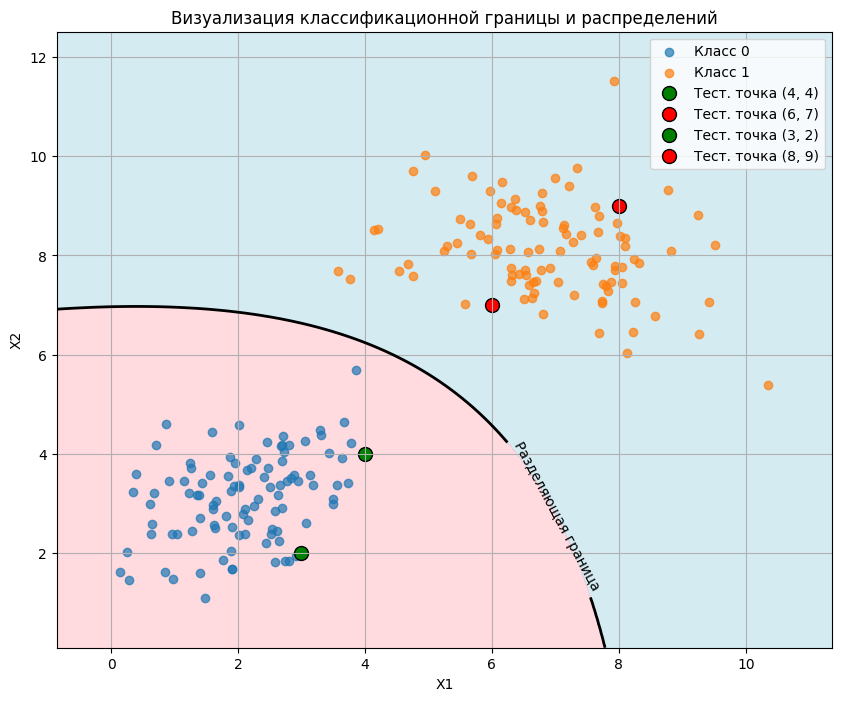

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Устанавливаем семена для воспроизводимости
np.random.seed(42)
# Размер выборки для каждого класса
num_samples = 100
# Генерация данных для класса 0
mean0 = np.array([2, 3])
cov0 = np.array([[1, 0.5],
                 [0.5, 1]])
X0 = np.random.multivariate_normal(mean0, cov0, size=num_samples)
y0 = np.zeros(num_samples)
# Генерация данных для класса 1
mean1 = np.array([7, 8])
cov1 = np.array([[1.5, -0.3],
                 [-0.3, 1]])
X1 = np.random.multivariate_normal(mean1, cov1, size=num_samples)
y1 = np.ones(num_samples)
# Объединяем данные
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))
# Расчет статистик для каждого класса
def compute_class_stats(X_class):
    mu = np.mean(X_class, axis=0)
    C = np.cov(X_class, rowvar=False)
    return mu, C
mu0_est, C0_est = compute_class_stats(X0)
mu1_est, C1_est = compute_class_stats(X1)

print("Среднее для класса 0 (μ0):", mu0_est)
print("Ковариационная матрица для класса 0 (C0):\n", C0_est)
print("Среднее для класса 1 (μ1):", mu1_est)
print("Ковариационная матрица для класса 1 (C1):\n", C1_est)

# Предположим равные априорные вероятности
prior0 = 0.5
prior1 = 0.5
# Функции для вычисления плотности многомерного нормального распределения
def gaussian_pdf(x, mu, cov):
    size = len(x)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / (np.sqrt((2*np.pi)**size * det_cov))
    diff = x - mu
    exponent = -0.5 * np.dot(np.dot(diff, inv_cov), diff)
    return norm_const * np.exp(exponent)

# Создание сетки для визуализации
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]
# Вычисление вероятностей для каждой точки сетки
p_x_given_y0 = np.array([gaussian_pdf(point, mu0_est, C0_est) for point in grid_points])
p_x_given_y1 = np.array([gaussian_pdf(point, mu1_est, C1_est) for point in grid_points])

# Расчёт разности для фона
diff = p_x_given_y0 * prior0 - p_x_given_y1 * prior1
diff = diff.reshape(xx.shape)
# Визуализация
plt.figure(figsize=(10, 8))
# Раскраска фона в зависимости от знака разности
plt.contourf(xx, yy, diff, levels=[-np.inf, 0, np.inf], colors=['lightblue', 'lightpink'], alpha=0.5)
# Построение датасета
plt.scatter(X0[:,0], X0[:,1], label='Класс 0', alpha=0.7)
plt.scatter(X1[:,0], X1[:,1], label='Класс 1', alpha=0.7)
# Построение разделяющей кривой (уровень 0)
contour = plt.contour(xx, yy, diff, levels=[0], colors='k', linewidths=2)
plt.clabel(contour, inline=1, fontsize=10, fmt='Разделяющая граница')

# Классификация новых точек по MAP
def classify(x):
    p_x_given_y0 = gaussian_pdf(x, mu0_est, C0_est)
    p_x_given_y1 = gaussian_pdf(x, mu1_est, C1_est)
    p_y0_given_x = p_x_given_y0 * prior0
    p_y1_given_x = p_x_given_y1 * prior1
    return 1 if p_y1_given_x > p_y0_given_x else 0
# Тестирование на новых данных
test_points = np.array([[4, 4], [6, 7], [3, 2], [8, 9]])
for point in test_points:
    predicted_class = classify(point)
print(f"Точка классифицирована как класс {predicted_class}")


# Тестовые точки
test_points = np.array([[4, 4], [6, 7], [3, 2], [8, 9]])
for point in test_points:
  predicted_class = classify(point)
  color = 'green' if predicted_class == 0 else 'red'
  plt.scatter(point[0], point[1], color=color, edgecolors='k', marker='o', s=100, label=f'Тест. точка ({point[0]}, {point[1]})' if 'Тест' not in plt.gca().get_legend_handles_labels()[1] else '')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Визуализация классификационной границы и распределений')
plt.grid(True)
plt.show()

### 4. LDA (linear discriminant analysis)

**Задание** Рассмотрите частный случай, когда для точек двух классов матрицы ковариации совпадают, т.е. $C_0=C_1$, но средние значения отличаются $\mu_0\neq\mu_1$. Выпишите явное выражение для разделяющей поверхности в этом случае. Визуализируйте такой случай аналогично предыдущему пункту. Про линейный и квадратичный дискриминантный анализ можете почитать здесь (https://scikit-learn.org/stable/modules/lda_qda.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii)

Реализуйте классификатор на основе метода линейного дискриминантного анализа по шаблону ниже. Данный алгоритм предполагает одинаковость матриц ковариации (т.е. считает одну общую матрицу ковариации, но разные средние) и использует линейное правило классификации. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```


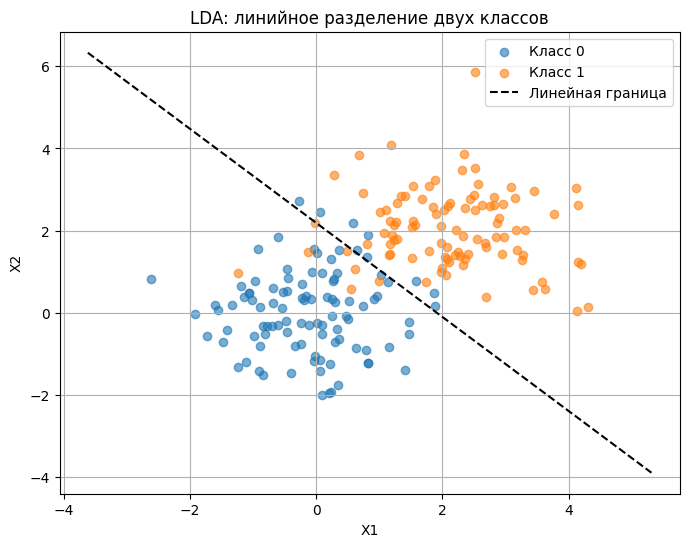

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
class myLDA(BaseEstimator):
  def __init__(self):
    self.coef_ = None
    self.intercept_ = None
    self.classes_ = None
    self.C_inv_ = None
    self.mu_ = {}
    self.P_ = {}
  def fit(self, X, y):
    self.classes_ = np.unique(y)
# Средние по классам
    for cls in self.classes_:
      self.mu_[cls] = X[y == cls].mean(axis=0)
# Общая матрица ковариации (Для LDA считаем совместную матрицу ковариации)
    n_samples = X.shape[0]
    n_features = X.shape[1]
    cov = np.zeros((n_features, n_features))
    for cls in self.classes_:
      Xc = X[y == cls] - self.mu_[cls]
      cov += Xc.T @ Xc
    cov /= (n_samples - len(self.classes_))
    self.C_inv_ = np.linalg.inv(cov)
# Общие классовые вероятности
    total_samples = len(y)
    for cls in self.classes_:
      self.P_[cls] = np.mean(y == cls)
# Построение линейных коэффициентов
    mu0 = self.mu_[self.classes_[0]]
    mu1 = self.mu_[self.classes_[1]]
    delta_mu = mu1 - mu0
# Формулы для коэффициентов линии
    self.coef_ = self.C_inv_ @ delta_mu
# Постоянная часть
    val = 0.5 * (mu0 @ self.C_inv_ @ mu0 - mu1 @ self.C_inv_ @ mu1) + np.log(self.P_[self.classes_[1]] / self.P_[self.classes_[0]])
    self.intercept_ = val
  def predict(self, X):
    linear_combination = X @ self.coef_ + self.intercept_
# В случае двумерных данных, разделяем по знакому
    return np.where(linear_combination > 0, self.classes_[1], self.classes_[0])

# Генерируем двумерные данные для двух классов
np.random.seed(42)
n_samples = 100
# Класс 0: среднее (0,0), ковариация единичная
X0 = np.random.multivariate_normal([0, 0], np.eye(2), n_samples)
# Класс 1: среднее (2,2), ковариация такая же
X1 = np.random.multivariate_normal([2, 2], np.eye(2), n_samples)

X = np.vstack((X0, X1))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))
# Обучение модели
clf = myLDA()
clf.fit(X, y)
# Визуализация данных и разделяющей линии
plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], label='Класс 0', alpha=0.6)
plt.scatter(X1[:, 0], X1[:, 1], label='Класс 1', alpha=0.6)
# Построим линию разделения
x_vals = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 200)
if clf.coef_[1] != 0:
    y_vals = -(clf.coef_[0] * x_vals + clf.intercept_) / clf.coef_[1]
    plt.plot(x_vals, y_vals, 'k--', label='Линейная граница')
else:
    # Вертикальная линия
    x_line = -clf.intercept_ / clf.coef_[0]
    plt.axvline(x=x_line, color='k', linestyle='--', label='Линейная граница')

plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('LDA: линийное разделение двух классов')
plt.grid(True)
plt.show()

### 5. Наивный байесовый классификатор (NaiveBayes)

**Задание**
Прочитать по наивный байесовый подход можно здесь (https://scikit-learn.org/stable/modules/naive_bayes.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii).  

Суть наивного предположения состоит в том, чтобы не считать совместную плотность вероятности для $n$-мерного случая, а рассматривать каждую переменную как независимую и считать одномерные распределения:  
$$p(x_1,x_2,...,x_n|y) => \prod\limits_{i=1}^{n}p(x_i|y)$$  
Это можно также рассматривать как обнуление всех внедиагональных элементов матрицы ковариации.  

**Задание**
Реализуйте классификатор на основе наивного байесового подхода с одномерным гауссовым распределением для каждой переменной. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```

In [6]:
from sklearn.base import BaseEstimator
import numpy as np

class myNB(BaseEstimator):
    def __init__(self):
        # Инициализация переменных для хранения параметров
        self.classes_ = None       # Массив уникальных классов
        self.means_ = None         # Средние по признакам для каждого класса
        self.stds_ = None          # Стандартные отклонения по признакам для каждого класса
        self.class_prior_ = None   # Апостериорные вероятности классов

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        n_features = X.shape[1]

        self.means_ = np.zeros((n_classes, n_features))
        self.stds_ = np.zeros((n_classes, n_features))
        self.class_prior_ = np.zeros(n_classes)

        for idx, cls in enumerate(self.classes_):
            X_c = X[y == cls]
            self.means_[idx, :] = X_c.mean(axis=0)
            self.stds_[idx, :] = X_c.std(axis=0, ddof=1)  # Используем ddof=1 для оценки по Образцовому стандартному отклонению
            self.class_prior_[idx] = X_c.shape[0] / X.shape[0]

        return self

    def _gaussian_density(self, X, mean, std): # Вычисление плотности вероятности для одномерного гауссова распределения.
        std = np.where(std == 0, 1e-9, std)
        coeff = 1.0 / (np.sqrt(2 * np.pi) * std)
        exponent = -0.5 * ((X - mean) / std) ** 2
        return coeff * np.exp(exponent)

    def predict(self, X): # Предсказание класса для новых данных.
        n_samples, n_features = X.shape
        n_classes = len(self.classes_)
        log_probs = np.zeros((n_samples, n_classes))

        for idx, cls in enumerate(self.classes_):
            log_prior = np.log(self.class_prior_[idx])  # Вычисляем логарифм апостериорной вероятности
            log_likelihood = np.zeros(n_samples)        # Инициализация массива логарифмов вероятностей признаков
            for feature_idx in range(n_features):
                mean = self.means_[idx, feature_idx]
                std = self.stds_[idx, feature_idx]
                density = self._gaussian_density(X[:, feature_idx], mean, std)        # Вычисляем плотности для каждого признака
                log_density = np.log(density)  # В логарифмах перемножение превращается в сложение
                log_likelihood += log_density
            log_probs[:, idx] = log_prior + log_likelihood

        # Предсказываем класс с максимальной логарифмической вероятностью
        class_indices = np.argmax(log_probs, axis=1)
        return self.classes_[class_indices]

# Пример использования
X, y = load_iris(return_X_y=True)

model = myNB()
model.fit(X, y)
predictions = model.predict(X[:10])
print(predictions)

[0 0 0 0 0 0 0 0 0 0]


### 6. Сравнение двух алгоритмов: LDA и NB

Создайте датасет для бинарной классификации, либо вручную либо используйте функцию `sklearn.datasets.make_classification`
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)  

Разделите датасет на обучающую и тестовую подвыборки.  
Проверьте работоспособность разработанных вами двух алгоритмов.  
Посчитайте основные метрики классификации: долю правильных ответов (accuracy), точность (Precision) и полноту (Recall).  
(про метрики прочитайте здесь https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)  
Сделайте выводы.  

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 1. Создаем датасет
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, n_classes=2, random_state=42)

# 2. Делим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Обучаем алгоритмы
lda = LinearDiscriminantAnalysis()
nb = GaussianNB()

lda.fit(X_train, y_train)
nb.fit(X_train, y_train)

# 4. Предсказываем на тестовой выборке
y_pred_lda = lda.predict(X_test)
y_pred_nb = nb.predict(X_test)

# 5. В вычислениях метрик используем более устойчивые для бинарной классификации параметры
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

# 6. Выводим результаты
print("LDA:")
print(f"Accuracy: {accuracy_lda:.2f}")
print(f"Precision: {precision_lda:.2f}")
print(f"Recall: {recall_lda:.2f}")

print("nNaive Bayes:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")

# 7. Итоговые выводы
print("nВыводы:")
if accuracy_lda > accuracy_nb:
    print("LDA показал лучшую точность.")
elif accuracy_lda < accuracy_nb:
    print("Naive Bayes показал лучшую точность.")
else:
    print("Оба алгоритма показали одинаковую точность.")


LDA:
Accuracy: 0.81
Precision: 0.80
Recall: 0.81
nNaive Bayes:
Accuracy: 0.80
Precision: 0.81
Recall: 0.74
nВыводы:
LDA показал лучшую точность.
